## Dashboard météo

In [2]:
import requests
import pandas as pd
import json


In [4]:
LAT = 45.5019
LON = -73.5674

url = f"https://api.open-meteo.com/v1/forecast?latitude={LAT}&longitude={LON}&hourly=temperature_2m,relative_humidity_2m,precipitation&daily=temperature_2m_max,temperature_2m_min&timezone=auto"

response = requests.get(url)
data = response.json()

df = pd.DataFrame({
    "time": data["hourly"]["time"],
    "temperature": data["hourly"]["temperature_2m"],
    "humidity": data["hourly"]["relative_humidity_2m"],
    "precipitation": data["hourly"]["precipitation"]
})

df["time"] = pd.to_datetime(df["time"])
df["date"] = df["time"].dt.strftime("%Y-%m-%d")


weekly = df.groupby("date").agg({
    "humidity": "mean",
    "precipitation": "sum"
}).reset_index()

result = {
    "humidity": weekly[["date", "humidity"]].to_dict(orient="records"),
    "precipitation": weekly[["date", "precipitation"]].to_dict(orient="records"),
    "temperature": data["daily"]
}

print(json.dumps(result))

{"humidity": [{"date": "2025-12-14", "humidity": 66.0}, {"date": "2025-12-15", "humidity": 77.20833333333333}, {"date": "2025-12-16", "humidity": 85.375}, {"date": "2025-12-17", "humidity": 86.16666666666667}, {"date": "2025-12-18", "humidity": 87.125}, {"date": "2025-12-19", "humidity": 74.70833333333333}, {"date": "2025-12-20", "humidity": 46.166666666666664}], "precipitation": [{"date": "2025-12-14", "precipitation": 0.0}, {"date": "2025-12-15", "precipitation": 0.0}, {"date": "2025-12-16", "precipitation": 0.0}, {"date": "2025-12-17", "precipitation": 0.5}, {"date": "2025-12-18", "precipitation": 4.3}, {"date": "2025-12-19", "precipitation": 6.0}, {"date": "2025-12-20", "precipitation": 0.3}], "temperature": {"time": ["2025-12-14", "2025-12-15", "2025-12-16", "2025-12-17", "2025-12-18", "2025-12-19", "2025-12-20"], "temperature_2m_max": [-5.5, -8.5, -4.2, 2.6, 4.0, 6.0, -1.6], "temperature_2m_min": [-12.7, -12.2, -10.5, -5.8, -8.8, -8.0, -10.4]}}


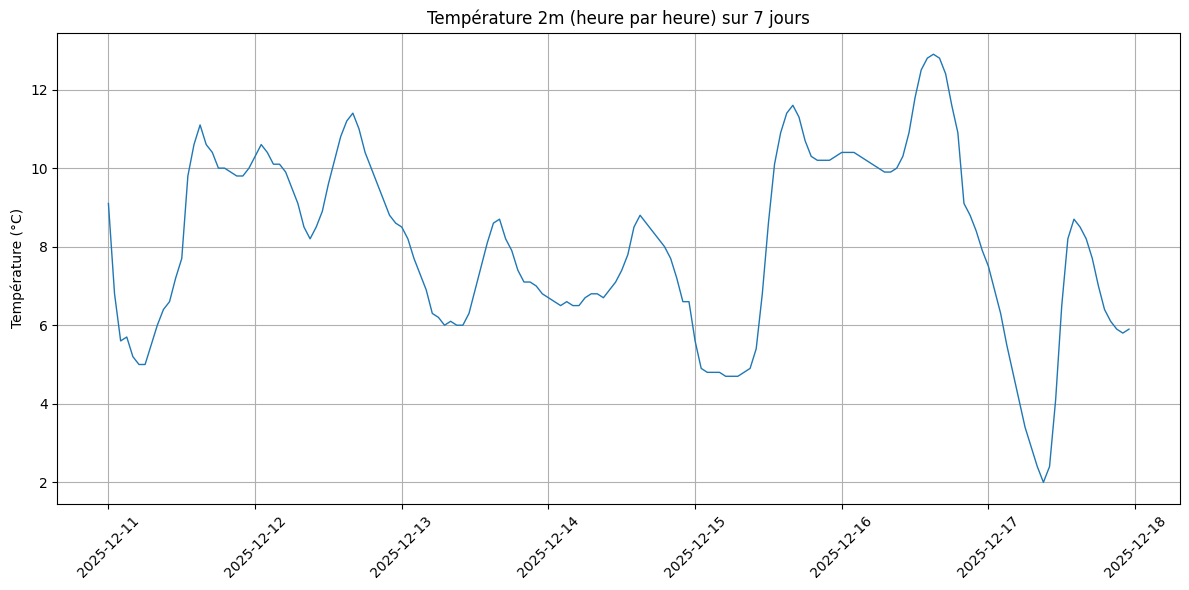

In [ ]:
latitude = 48.8566   #Paris
longitude = 2.3522
url = "https://api.open-meteo.com/v1/forecast"

params = {
    "latitude": latitude,
    "longitude": longitude,
    "hourly": "temperature_2m",
    "timezone": "auto"
}

response = requests.get(url, params=params)
data = response.json()

times = data["hourly"]["time"]
temps = data["hourly"]["temperature_2m"]


df = pd.DataFrame({
    "Datetime": pd.to_datetime(times),
    "Temperature_2m": temps
})

# 📈 Tracé du graphique
plt.figure(figsize=(12, 6))
plt.plot(df["Datetime"], df["Temperature_2m"], linewidth=1)
plt.title("Température 2m (heure par heure) sur 7 jours")
plt.ylabel("Température (°C)")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


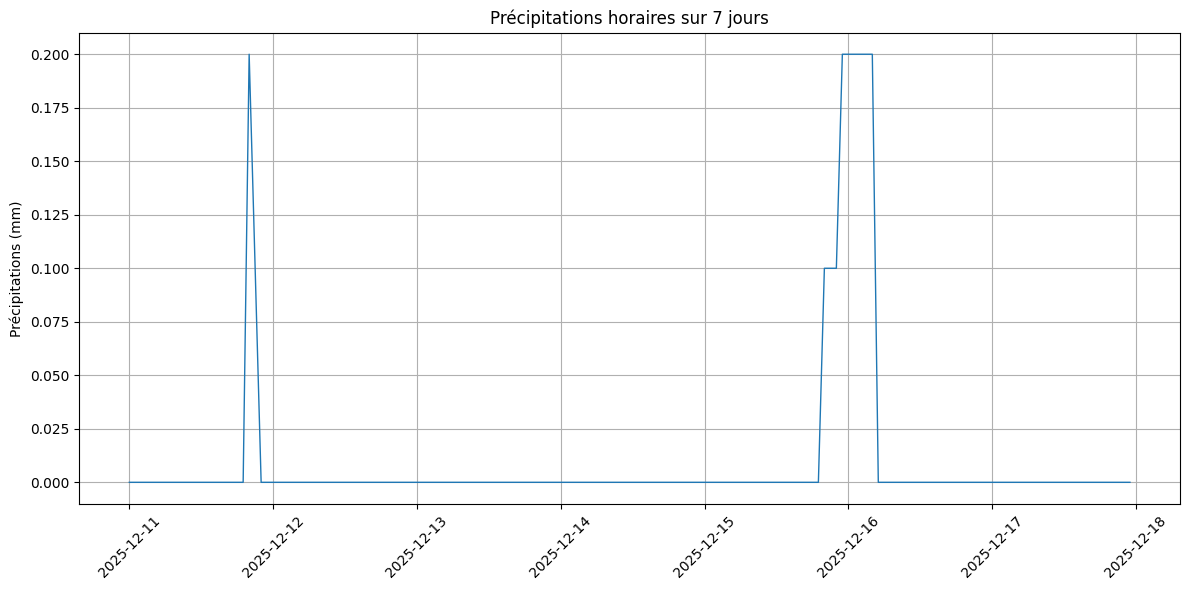

In [ ]:
latitude = 48.8566
longitude = 2.3522

url = "https://api.open-meteo.com/v1/forecast"
params = {
    "latitude": latitude,
    "longitude": longitude,
    "hourly": "precipitation",
    "timezone": "auto"
}

#Appel API
response = requests.get(url, params=params)
data = response.json()

times = data["hourly"]["time"]
precip = data["hourly"]["precipitation"]

df = pd.DataFrame({
    "Datetime": pd.to_datetime(times),
    "Precipitation_mm": precip
})

plt.figure(figsize=(12, 6))
plt.plot(df["Datetime"], df["Precipitation_mm"], linewidth=1)
plt.ylabel("Précipitations (mm)")
plt.title("Précipitations horaires sur 7 jours")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()